In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy

In [2]:
wavelength = 1
Ns = 9
dy = wavelength / 2
Lz = 5 * wavelength
Nr = 9
k = 2 * np.pi / wavelength

In [3]:
def euclidean_distance(s, d) -> float:
    # s -> source point
    # d -> destination (receiving point)
    s = np.asarray(s)
    d = np.asarray(d)
    return np.linalg.norm(d - s)

def free_space_transfer_function(r_s, r_r, k) -> np.array:
    # r_s -> matrix of source points, shape (Ns, 2)
    # r_r -> matrix of recieving points, shape (Nr, 2)
    # k -> wavenumber
    # returns g -> matrix of floats, shape (Nr, Ns)
    g = np.zeros((len(r_r), len(r_s)), dtype=complex)
    for i, r in enumerate(r_r):
        for j, s in enumerate(r_s):
            d = euclidean_distance(s, r)
            # Check for eq 39
            if j == 2 and i == 0:
                check_d = d
            numerator = -np.exp(1j * k * d)
            denominator = 4 * np.pi * d
            g[i,j] = np.round(numerator / denominator, 5) # rounding here is questionable, but I need it for the checks
    return g, check_d

def sum_rule(g:np.array(complex)) -> float:
    S = np.asarray(0., dtype=np.float64)
    for i in g:
        for j in i:
            S += np.abs(j)**2
    return S

def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

In [4]:
s = np.asarray([(0, i * wavelength / 2) for i in range(Ns)])
d = np.asarray([(5 * wavelength, i * wavelength / 2) for i in range(Nr)])
Gsr, check_d = free_space_transfer_function(s, d, k)
gsr = np.round(-4 * np.pi * Lz, 2)

In [5]:
S = sum_rule(Gsr)

In [6]:
# eq 51 check
print(np.allclose(S, 72.65 / (gsr**2), atol=1e-6))

True


In [7]:
gsr_Gsrd_Gsr = np.round(gsr**2 * np.matmul(np.matrix.getH(Gsr), Gsr), 2)
matprint(gsr_Gsrd_Gsr)
print(gsr_Gsrd_Gsr.shape)

   7.55+0j   3.95-4.72j   0.03-2.32j   0.12+1.16j    0.6+1.63j    0.08+0.1j   0.18-1.11j   0.49-0.54j    -0.35-0j  
3.95+4.72j      7.93+0j   5.02-3.67j   0.95-1.72j  -0.74+1.22j  -0.93+1.36j   0.06-0.02j      1.15-0j  0.49+0.54j  
0.03+2.32j   5.02+3.67j      8.22+0j    5.8-2.33j   1.48-0.89j  -1.46+0.53j     -1.61-0j   0.06+0.02j  0.18+1.11j  
0.12-1.16j   0.95+1.72j    5.8+2.33j       8.4+0j    6.21-0.8j      1.64+0j  -1.46-0.53j  -0.93-1.36j   0.08-0.1j  
 0.6-1.63j  -0.74-1.22j   1.48+0.89j    6.21+0.8j      8.46-0j    6.21+0.8j   1.48+0.89j  -0.74-1.22j   0.6-1.63j  
 0.08-0.1j  -0.93-1.36j  -1.46-0.53j      1.64+0j    6.21-0.8j       8.4-0j    5.8+2.33j   0.95+1.72j  0.12-1.16j  
0.18+1.11j   0.06+0.02j     -1.61+0j  -1.46+0.53j   1.48-0.89j    5.8-2.33j      8.22+0j   5.02+3.67j  0.03+2.32j  
0.49+0.54j      1.15+0j   0.06-0.02j  -0.93+1.36j  -0.74+1.22j   0.95-1.72j   5.02-3.67j      7.93+0j  3.95+4.72j  
  -0.35+0j   0.49-0.54j   0.18-1.11j    0.08+0.1j    0.6+1.63j   0.12+1.

In [17]:
Gsr_Gsrd = np.matmul(Gsr, np.matrix.getH(Gsr))
eig_vals, eig_vect = np.linalg.eigh(Gsr_Gsrd)
eig_vect = np.flip(eig_vect)
eig_vals = np.round(np.flip(eig_vals), 5)
print(eig_vals)
print(eig_vals * (gsr**2))
print(np.sum(eig_vals * (gsr**2)))

[5.25e-03 5.17e-03 4.84e-03 2.64e-03 4.80e-04 3.00e-05 0.00e+00 0.00e+00
 0.00e+00]
[20.72494672 20.40913801 19.10642708 10.4216875   1.89485227  0.11842827
  0.          0.          0.        ]
72.67547984899998


In [20]:
eig_vect.shape

(9, 9)

In [40]:
x = np.linspace(1e-6, Lz, 100)
y = np.linspace(0, dy * Ns, 100)
xx, yy = np.meshgrid(x,y)

points = np.stack([xx.ravel(), yy.ravel()], axis=-1)

In [61]:
distance = []
for p in points:
    distance.append(euclidean_distance(s[3], p))
distance = np.stack(distance)
print(distance.shape)
distance = np.reshape(distance, xx.shape)
print(distance.shape)


(10000,)
(100, 100)


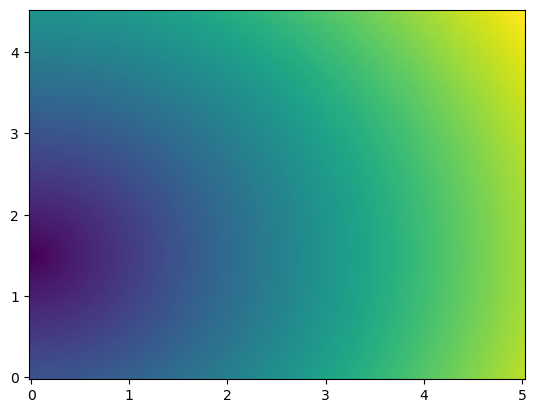

In [62]:
plt.pcolormesh(xx, yy, distance)